In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
dirs = ['lowgr', 'convtest', 'midgr']
snapshot = 99
line_of_sight = 0
box = 'tng100'
resolutions = [800, 1000, 1200]
rlibs = ['vnXgalaxy', 'hisubhaloXgalaxy', 'hiptlXgalaxy']
flib_og = FigureLibrary()
for i in range(len(resolutions)):
    path = base + '%s_%sB_%03dS_%dA_%dR/results/'%(dirs[i], 
                        box, snapshot, line_of_sight, resolutions[i])
    
    for rlib in rlibs:
        filename = '%s_%sB_%03dS_%dA_%dR.pkl_rlib.pkl'%(rlib, 
                        box, snapshot, line_of_sight, resolutions[i])
        f = pkl.load(open(path + filename, 'rb'))
        flib_og.addResults(f)

del f

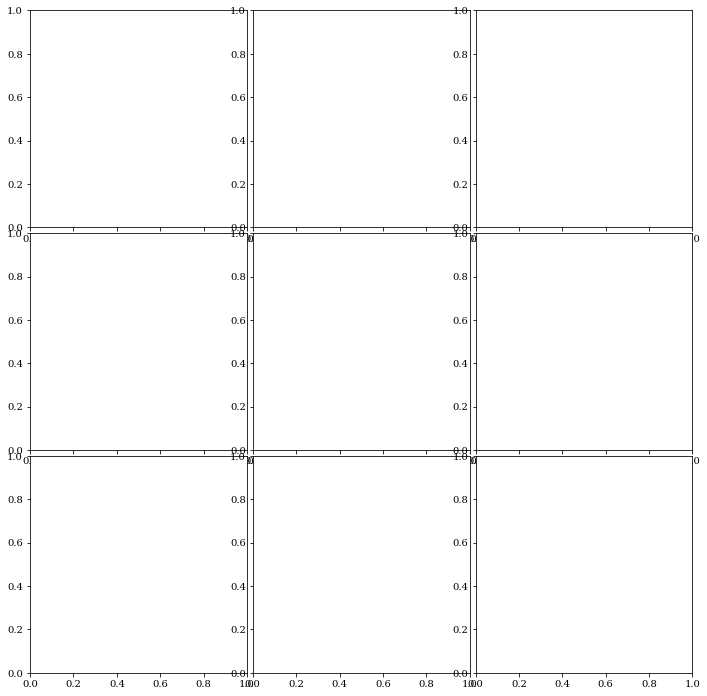

In [3]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 3)
fig, panels = flib.getFig()

In [4]:
ip = {}
ip['space'] = 'real'
ip['HI_res'] = 'diemer'
ip['gal_res'] = 'diemer'
ip['color_cut'] = ['0.60', 'None']
rowp = 'fieldname'
colp = 'color'
ip['species'] = 'stmass'
rowvals = ['hisubhalo', 'hiptl', 'vn']
colvals = ['resolved', 'blue', 'red']
figarr = flib.arrangeResults(ip, rowp, rowvals, colp, colvals, 'grid_resolution')

In [5]:
resolved_colors = sbn.color_palette('Greys', 3)
blue_colors = sbn.color_palette('Blues', 3)
red_colors = sbn.color_palette('Reds', 3)
colors = [resolved_colors, blue_colors, red_colors]
low_colors = [i[0] for i in colors]
mid_colors = [i[1] for i in colors]
hi_colors = [i[2] for i in colors]
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        if i == 0 or i == 1:
            flib.plotFill(idx, {'grid_resolution':800},
                         fill_kwargs = {'color':low_colors[j], 'label':'800$^3$'})
            flib.plotFill(idx, {'grid_resolution':1000},
                         fill_kwargs = {'color':mid_colors[j], 'label':'1000$^3$'})
            flib.plotFill(idx, {'grid_resolution':1200},
                         fill_kwargs = {'color':hi_colors[j], 'label':'1200$^3$'})
        else:
            flib.plotLine(idx, 800,
                         line_kwargs = {'color':low_colors[j], 'label':'800$^3$'})
            flib.plotLine(idx, 1000,
                         line_kwargs = {'color':mid_colors[j], 'label':'1000$^3$'})
            flib.plotLine(idx, 1200,
                         line_kwargs = {'color':hi_colors[j], 'label':'1200$^3$'})

In [6]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'lower left'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI-gal}', txt_kwargs = axiskw)

ValueError: Axis limits cannot be NaN or Inf